<a href="https://colab.research.google.com/github/DrVishalChaudhary/_DeepLearningProjects/blob/main/Binary_Classification_using_CNN_for_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification Problem: Supervised Learning

* Classification between two classes; Cat and Dog

* CNN model learn pattern of classes (Dog or Cat) during training 

* Accuracy depends on learning of model


In [ ]:
# Library Import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import os

In [ ]:
# Data path
data_dir = "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog"

train_data_path = data_dir + '/Train/'
test_data_path = data_dir + '/Test/'

In [ ]:
train_data_path

'/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/'

In [ ]:
len(os.listdir(test_data_path))

2

# Identifing Image size

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/"

Cat  Dog


In [ ]:
# Average dimension for Cat images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/Cat'):
  img = imread(train_data_path + '/Cat/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(357.7486548808609, 413.9631053036126)

In [ ]:
# Average dimension for Dog images
first_dim1 = []
second_dim1 = []
for image_no in os.listdir(train_data_path + '/Dog'):
  img = imread(train_data_path + '/Dog/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim1.append(d1)
  second_dim1.append(d2)

In [ ]:
first_dim1_mean = np.mean(first_dim1)
second_dim1_mean = np.mean(second_dim1)
first_dim1_mean, second_dim1_mean

(364.63720215219064, 397.56879323597235)

In [ ]:
# First dimension average value
(358 + 364)/2

361.0

In [ ]:
# Second dimension average value
(414+399)/2

406.5

In [ ]:
input_shape = (361, 406, 3)

# Augmentation and Non-augmentation data

* train_data and test_data: Non-augmented data

* train_data_augmented and test_data_augmented: Augmented data

In [ ]:
#Train and Test data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# Train and Test data with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                                    width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen_augmented = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data_augmented = test_datagen_augmented.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Model 1: 10, 16, 16

* CNN filters: 10, 16, 16

* Dense layers: 16, 1

* Activation function: relu and sigmoid

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* No augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)

model1 = Sequential()
model1.add(Conv2D(10, 3, input_shape = input_shape, activation='relu'))
model1.add(MaxPool2D())
model1.add(Conv2D(16, 3, activation='relu'))
model1.add(MaxPool2D())
model1.add(Conv2D(16, 3, activation='relu'))
model1.add(MaxPool2D())

model1.add(Flatten())
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= 'accuracy')

model1.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
82/82 [==============================] - 1334s 16s/step - loss: 0.6941 - accuracy: 0.5384 - val_loss: 0.6739 - val_accuracy: 0.5300
Epoch 2/20
82/82 [==============================] - 21s 250ms/step - loss: 0.6454 - accuracy: 0.6414 - val_loss: 0.6410 - val_accuracy: 0.6375
Epoch 3/20
82/82 [==============================] - 21s 250ms/step - loss: 0.5369 - accuracy: 0.7302 - val_loss: 0.6383 - val_accuracy: 0.6350
Epoch 4/20
82/82 [==============================] - 20s 247ms/step - loss: 0.4059 - accuracy: 0.8228 - val_loss: 0.6806 - val_accuracy: 0.6375
Epoch 5/20
82/82 [==============================] - 20s 245ms/step - loss: 0.2514 - accuracy: 0.8939 - val_loss: 0.8232 - val_accuracy: 0.6600
Epoch 6/20
82/82 [==============================] - 21s 250ms/step - loss: 0.1364 - accuracy: 0.9516 - val_loss: 1.1008 - val_accuracy: 0.6500
Epoch 7/20
82/82 [==============================] - 21s 250ms/step - loss: 0.0665 - accuracy: 0.9812 - val_loss: 1.4094 - val_accuracy: 0.6650

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 359, 404, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 202, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 200, 16)      1456      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 100, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 98, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 49, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33712)             0

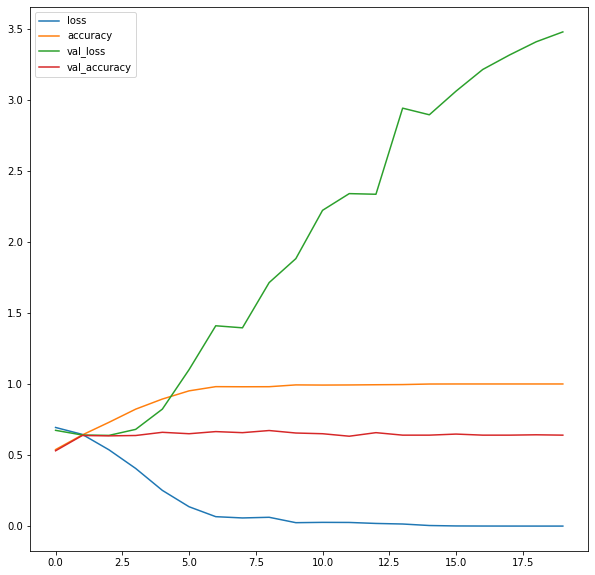

In [ ]:
pd.DataFrame(model1.history.history).plot(figsize = (10,10))

In [ ]:
model1.evaluate(test_data)

13/13 [==============================] - 3s 193ms/step - loss: 3.4767 - accuracy: 0.6400


[3.4766664505004883, 0.6399999856948853]

# Model 2: 10, 16, 16

* CNN filters: 10, 16, 16

* Dense layers: 16, 1

* Activation function: relu and sigmoid

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* Augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)


model2 = Sequential()
model2.add(Conv2D(10, 3, input_shape = input_shape, activation='relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(16, 3, activation='relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(16, 3, activation='relu'))
model2.add(MaxPool2D())

model2.add(Flatten())
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= 'accuracy')

model2.fit(train_data_augmented, epochs=50, steps_per_epoch=len(train_data_augmented), validation_data=test_data_augmented, validation_steps=len(test_data_augmented))

Epoch 1/50
82/82 [==============================] - 93s 1s/step - loss: 0.6968 - accuracy: 0.5042 - val_loss: 0.6885 - val_accuracy: 0.5875
Epoch 2/50
82/82 [==============================] - 92s 1s/step - loss: 0.6925 - accuracy: 0.5288 - val_loss: 0.6914 - val_accuracy: 0.5050
Epoch 3/50
82/82 [==============================] - 92s 1s/step - loss: 0.6799 - accuracy: 0.5538 - val_loss: 0.6826 - val_accuracy: 0.5700
Epoch 4/50
82/82 [==============================] - 92s 1s/step - loss: 0.6926 - accuracy: 0.5065 - val_loss: 0.6867 - val_accuracy: 0.5025
Epoch 5/50
82/82 [==============================] - 93s 1s/step - loss: 0.6896 - accuracy: 0.5803 - val_loss: 0.6883 - val_accuracy: 0.6275
Epoch 6/50
82/82 [==============================] - 93s 1s/step - loss: 0.6922 - accuracy: 0.5638 - val_loss: 0.6692 - val_accuracy: 0.5600
Epoch 7/50
82/82 [==============================] - 95s 1s/step - loss: 0.6690 - accuracy: 0.5934 - val_loss: 0.6351 - val_accuracy: 0.6250
Epoch 8/50
82/82 [==

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 359, 404, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 179, 202, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 177, 200, 16)      1456      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 88, 100, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 86, 98, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 49, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33712)            

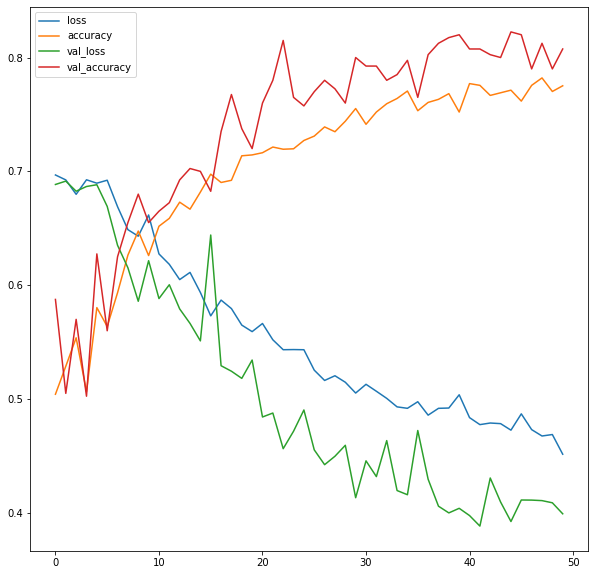

In [ ]:
pd.DataFrame(model2.history.history).plot(figsize = (10,10))

In [ ]:
model2.evaluate(test_data)

13/13 [==============================] - 3s 195ms/step - loss: 0.3992 - accuracy: 0.8075


[0.3992128074169159, 0.8075000047683716]

# Model 3: 10, 16, 16, 32

* CNN filters: 10, 16, 32, 32

* Dense layers: 16, 1

* Activation function: relu and sigmoid

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* No Augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)

model3 = Sequential()
model3.add(Conv2D(10, 3, input_shape = input_shape, activation='relu'))
model3.add(MaxPool2D())
model3.add(Conv2D(16, 3, activation='relu'))
model3.add(MaxPool2D())
model3.add(Conv2D(32, 3, activation='relu'))
model3.add(MaxPool2D())
model3.add(Conv2D(32, 3, activation='relu'))
model3.add(MaxPool2D())

model3.add(Flatten())
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= 'accuracy')

model3.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/50
82/82 [==============================] - 755s 9s/step - loss: 0.6917 - accuracy: 0.5284 - val_loss: 0.6634 - val_accuracy: 0.6150
Epoch 2/50
82/82 [==============================] - 22s 264ms/step - loss: 0.6459 - accuracy: 0.6299 - val_loss: 0.7005 - val_accuracy: 0.5800
Epoch 3/50
82/82 [==============================] - 22s 264ms/step - loss: 0.5871 - accuracy: 0.6849 - val_loss: 0.5445 - val_accuracy: 0.7200
Epoch 4/50
82/82 [==============================] - 21s 260ms/step - loss: 0.5262 - accuracy: 0.7421 - val_loss: 0.5769 - val_accuracy: 0.6975
Epoch 5/50
82/82 [==============================] - 21s 259ms/step - loss: 0.4740 - accuracy: 0.7813 - val_loss: 0.5328 - val_accuracy: 0.7375
Epoch 6/50
82/82 [==============================] - 21s 257ms/step - loss: 0.3915 - accuracy: 0.8209 - val_loss: 0.5335 - val_accuracy: 0.7625
Epoch 7/50
82/82 [==============================] - 21s 255ms/step - loss: 0.3323 - accuracy: 0.8597 - val_loss: 0.5993 - val_accuracy: 0.7225
E

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 359, 404, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 179, 202, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 177, 200, 16)      1456      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 88, 100, 16)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 98, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 47, 32)       

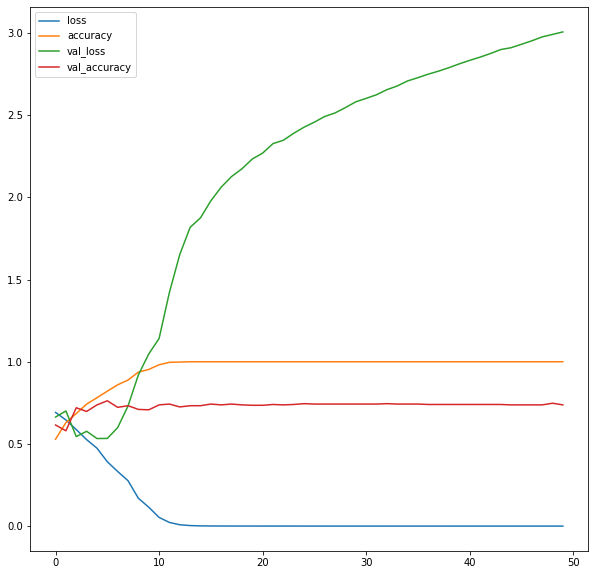

In [ ]:
pd.DataFrame(model3.history.history).plot(figsize = (10,10))

In [ ]:
model3.evaluate(test_data)

13/13 [==============================] - 3s 198ms/step - loss: 3.0069 - accuracy: 0.7375


[3.0069119930267334, 0.737500011920929]

# Model 4: 10, 16, 32, 32

* CNN filters: 10, 16, 16, 32

* Dense layers: 16, 1

* Activation function: relu and sigmoid

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* Augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)

model4 = Sequential()
model4.add(Conv2D(10, 3, input_shape = input_shape, activation='relu'))
model4.add(MaxPool2D())
model4.add(Conv2D(16, 3, activation='relu'))
model4.add(MaxPool2D())
model4.add(Conv2D(32, 3, activation='relu'))
model4.add(MaxPool2D())
model4.add(Conv2D(32, 3, activation='relu'))
model4.add(MaxPool2D())

model4.add(Flatten())
model4.add(Dense(32, activation = 'relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= 'accuracy')

model4.fit(train_data_augmented, epochs=50, steps_per_epoch=len(train_data_augmented), validation_data=test_data_augmented, validation_steps=len(test_data_augmented))

Epoch 1/50
82/82 [==============================] - 92s 1s/step - loss: 0.6906 - accuracy: 0.5338 - val_loss: 0.6614 - val_accuracy: 0.5750
Epoch 2/50
82/82 [==============================] - 91s 1s/step - loss: 0.6893 - accuracy: 0.5496 - val_loss: 0.6658 - val_accuracy: 0.6300
Epoch 3/50
82/82 [==============================] - 91s 1s/step - loss: 0.6675 - accuracy: 0.6122 - val_loss: 0.7119 - val_accuracy: 0.5150
Epoch 4/50
82/82 [==============================] - 92s 1s/step - loss: 0.6479 - accuracy: 0.6234 - val_loss: 0.6036 - val_accuracy: 0.6650
Epoch 5/50
82/82 [==============================] - 92s 1s/step - loss: 0.6441 - accuracy: 0.6368 - val_loss: 0.5921 - val_accuracy: 0.7250
Epoch 6/50
82/82 [==============================] - 92s 1s/step - loss: 0.5985 - accuracy: 0.6910 - val_loss: 0.5735 - val_accuracy: 0.6700
Epoch 7/50
82/82 [==============================] - 92s 1s/step - loss: 0.5998 - accuracy: 0.6718 - val_loss: 0.5526 - val_accuracy: 0.7250
Epoch 8/50
82/82 [==

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 359, 404, 10)      280       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 179, 202, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 177, 200, 16)      1456      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 88, 100, 16)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 86, 98, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 43, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 47, 32)       

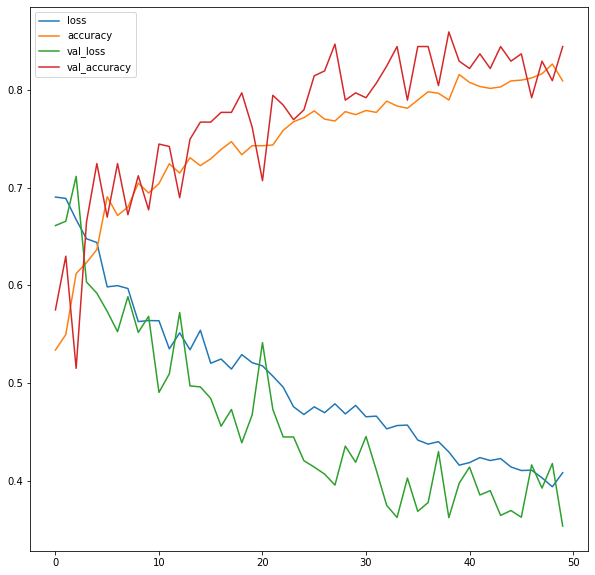

In [ ]:
pd.DataFrame(model4.history.history).plot(figsize = (10,10))

In [ ]:
model4.evaluate(test_data)

13/13 [==============================] - 3s 194ms/step - loss: 0.3533 - accuracy: 0.8450


[0.35325175523757935, 0.8450000286102295]